In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split
from scipy.stats import norm


def plot_curve(epochs, hist, list_of_metrics, name, title, label_list, savename=None):
    """Plot a curve of one or more classification metrics vs. epoch."""
    plt.figure(figsize=(8,5))
    mf = 18

    plt.title(title)
    plt.xlabel("Epoch "+name, fontsize=mf)
    plt.ylabel("mean absolute error", fontsize=mf)


    for (m, label) in zip(list_of_metrics, label_list):
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=label)
    plt.legend(fontsize=mf)
    if savename is not None:
        plt.savefig(f"plots/{savename}.eps", format="eps")


# for activation functions check https://keras.io/api/layers/activations/


# returns dataframe
def test_model(model, dataset, label_name, savename = None):
    features = {name: np.array(value) for name, value in dataset.items()}
    features.pop(label_name)
    label = dataset[label_name].to_numpy()
    evaluation = model.evaluate(x=features, y=label, batch_size=50, verbose=0)
    print("evaluation", evaluation)
    predicted = model.predict(features)

    df_test = pd.DataFrame(label, columns=[label_name])

    df_predict = pd.DataFrame(predicted, columns=[label_name+"_pred"])
    if savename is not None:
        savename=savename.replace(" ", "_")

        pd.concat([df_test, df_predict], axis=1).to_csv("errors/"+savename+".csv")

    return pd.concat([df_test, df_predict], axis=1)


def histogramm(testing_df, name, max_range, bins_val, y_max=0, savename=None):
    df_columns = testing_df.columns
    data = testing_df[df_columns[0]]-testing_df[df_columns[1]]
    mu, std = norm.fit(data)


    plt.figure(figsize=(8,5))
    mf = 18
    plt.hist(data, bins=bins_val)
    if max_range is not None:
        plt.xlim(-max_range, max_range)
    if(y_max != 0):
        plt.ylim(0, y_max)
    mu, std = norm.fit(data)

    plt.xlabel("Difference", fontsize=mf)
    plt.ylabel("Occurence", fontsize=mf)
    plt.title(name+"  \t mean = %.4f,  std = %.4f" % (mu, std),fontsize=mf)
    if savename is not None:
        savename=savename.replace(" ", "_")
        plt.savefig("plots/hist/"+savename+".eps", format="eps")
    plt.show()


<ipython-input-1-7c1daeedadd2>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
def generate_results(df, features, label, model_dir, model_name, max_range, num_bins, save_name):
    
    
    all_used_columns = features[:]
    all_used_columns.append(label)
    df__train, df_test = train_test_split(
        df[all_used_columns], test_size=0.20, random_state=42)
    # feature_columns_A = []

    my_model = tf.keras.models.load_model(model_dir)
    print(my_model.summary())
    error = test_model(my_model, df_test, label, savename=save_name)

   # print(error.head(50))  # change to save file
    histogramm(error, model_name, max_range, num_bins,savename=save_name)  # add save option


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________
None
Consider rewriting this model with the Functional API.
evaluation [0.0033441421110183, 0.0033441421110183]
Consider rewriting this model with the Functional API.


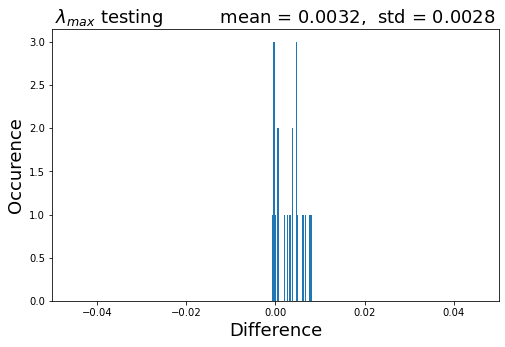

In [3]:
# lambda from main maximum
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/lambda_100_steps.csv"),

    # configure labels and features
    features=["main_maximum"],
    label="lambda",

    # setup model or load model from file
    model_dir="../Models/lambda_100_main_max",
    model_name="$\lambda_{max}$ testing",
    save_name = "lambda_max_test",
    # histogram options
    max_range=0.05,
    num_bins=30,

)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________
None
Consider rewriting this model with the Functional API.
evaluation [0.19770681858062744, 0.19770681858062744]
Consider rewriting this model with the Functional API.


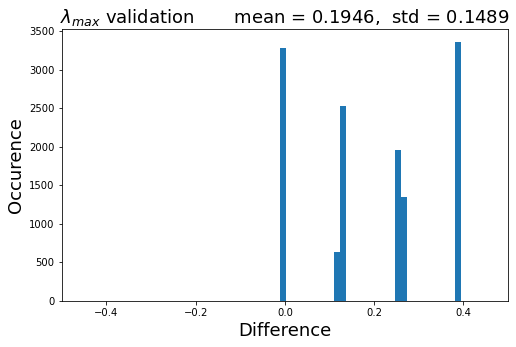

In [4]:
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/all_param_4_values_with_overlap.csv"),

    # configure labels and features
    features=["main_maximum"],
    label="lambda",

    # setup model or load model from file
    model_dir="../Models/lambda_100_main_max",
    model_name="$\lambda_{max}$ validation",
    save_name = "lambda_max_val",
    # histogram options
    max_range=0.5,
    num_bins=30,

)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 35)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1080      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                7

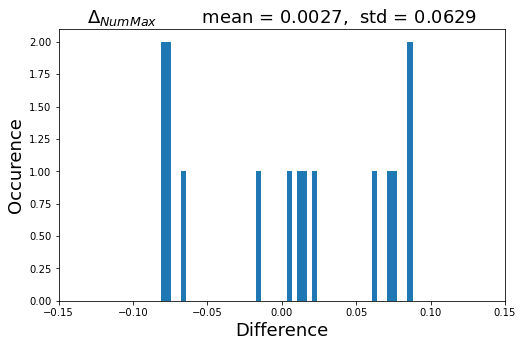

In [5]:
# lambda from main maximum
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/delta_100_steps.csv"),

    # configure labels and features
    features=["no_of_max"],
    label="delta",

    # setup model or load model from file
    model_dir="../Models/delta_100_num_max",
    model_name="$\Delta_{NumMax}$",
    save_name = "Delta_num_max_test",
    # histogram options
    max_range=0.15,
    num_bins=50,

)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 35)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1080      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                7

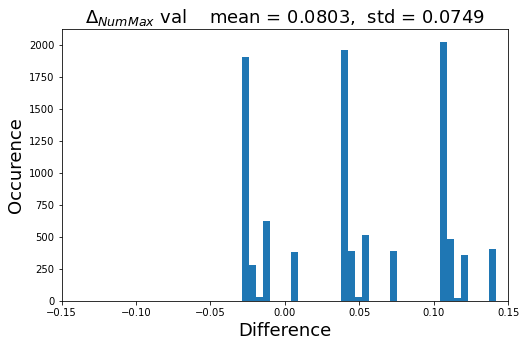

In [6]:
# lambda from main maximum
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/all_param_4_values_with_overlap.csv"),

    # configure labels and features
    features=["no_of_max"],
    label="delta",

    # setup model or load model from file
    model_dir="../Models/delta_100_num_max",
    model_name="$\Delta_{NumMax}$ val",
    save_name = "delta_num_max_val",
    # histogram options
    max_range=0.15,
    num_bins=50,

)